# Experiment 3

### Experiment Description

In this experiment, we aim to improve the results obtained in Experiment 2. We modified the neural network architecture, the inputs and outputs to be considered, the reward mechanism, and the training parameters.

### Modifications

#### Neural Network Architecture

For this experiment, another hidden layer of 256 nodes was added at the beginning of the two previously established ones. This was done to detect more numerical patterns that may appear in the analysis. In addition to this, the inputs and outputs were also modified, so considering all of this, the architecture of the neural network would be as follows:

- Input: 17 Nodes (Features)
- Hidden Layer 1: 256 Nodes (ReLU)
- Hidden Layer 2: 128 Nodes (ReLU)
- Hidden Layer 3: 64 Nodes (ReLU)
- Output: 8 Nodes (Actions)

#### Input Modifications

Five financial parameters were added to have a global perspective of the stock’s history for better decision-making

- **Position/cash ratio:** Invested capital proportion vs. available cash balance.
- **% portfolio invested:** Portfolio allocation percentage per trade position.
- **Relative mean price:** Price average compared to a historical baseline.
- **Normalized volatility:** Volatility scaled to a standard range
- **Scaled RSI (0-1):** Relative Strength Index rescaled for neural network input.

Total 17 Inputs:
- **close_price:** Most recent closing price of Microsoft stock.
- **sma_5:** Average of last 5 closing prices, shows very short-term trend.
- **sma_20:** Average of last 20 closes, shows short to mid-term trend.
- **sma_50:** Average of last 50 closes, shows longer-term market trend.
- **rsi_14:** Relative Strength Index, detects overbought (>70) or oversold (<30) conditions.
- **macd:** Measures momentum by subtracting 26-EMA from 12-EMA.
- **macd_signal:** 9-day EMA of MACD, used to signal buy/sell crossovers.
- **bollinger_b:** Price's position relative to Bollinger Bands; near 1 means close to upper band.
- **atr_14:** Average True Range; shows volatility based on recent high-low price ranges.
- **momentum_10:** Difference between current price and price 10 days ago.
- **cash:** Current uninvested capital available to buy shares.
- **shares_held:** Number of MSFT shares currently owned by the agent.
- **Position/cash ratio:** Invested capital proportion vs. available cash balance.
- **% portfolio invested:** Portfolio allocation percentage per trade position.
- **Relative mean price:** Price average compared to a historical baseline.
- **Normalized volatility:** Volatility scaled to a standard range
- **Scaled RSI (0-1):** Relative Strength Index rescaled for neural network input.

#### Outputs Modifications

The "hold" option was removed from the bot to ensure it is constantly trading, and one more action was added for both buying and selling to allow more purchase types. As a result, a total of 8 output actions were generated

- **Buy small:** Buy a small number of shares using a 5% of available cash.
- **Buy small - medium:** Buy more shares using a moderate 10% of cash.
- **Buy large - medium:** Buya litlle more shares using a moderate 20% of cash.
- **Buy large:** Buy many shares using a large 35% of available cash.
- **Sell small:** Sell a small 10% number of shares.
- **Sell small - medium:** Sell more number of shares 25%.
- **Sell large - medium:** Sell a half number of shares (50%).
- **Sell all:** Sell all currently held shares.

#### Reward Mechanism

A whole new reward system was created, which is made up of 5 different areas: “Basic Profit & Loss”, “Risk-adjusted Return”, “Penalty for Invalid Action”, “Optimal Position Management” and “Trend Alignment”. Each of these areas has a different weight in the reward, based on its importance.

The following weights were assigned to each of these areas according to their importance in the reward:
- **Basic Profit & Loss:** 40%
- **Risk-adjusted Return:** 30%
- **Penalty for Invalid Action:** 15%
- **Optimal Position Management:** 10%
- **Trend Alignment:** 5%

The metric used to evaluate each of the following areas was the following:

- **Basic Profit & Loss:** Returns the portfolio performance for the day (if it increased or decreased).
- **Risk-adjusted Return:** Calculates the Sharpe Ratio using the last 20 returns obtained.
- **Penalty for Invalid Action:** Penalizes if an invalid action was taken (buying without money or selling without having stocks).
- **Optimal Position Management:** Rewards if the value in stocks is between 30% – 70% of the portfolio, penalizes if it goes outside that range.
- **Trend Alignment:** Aligns the actions with the market trend."

#### Training Parameters

- learning_rate = 3e-4 (More stable)
- minibatch_size = 64   (Better for DL)
- discount_factor = 0.9  (Focus onb short periods)
- replay_buffer_size = int(1e6)  (10x larger)
- interpolation_parameter = 1e-2 


### Get S&P 500 ETF Stocks Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
testing_SPY = pd.read_csv('../Data/Train_Test/testing_SPY_e2.csv')
testing_SPY = testing_SPY.drop(['Unnamed: 0'], axis=1)
testing_SPY.head()

,Date,Close,SMA_5,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,Bollinger_b,ATR_14,Momentum_10
0,2005-01-03,82.073990,82.529770,81.819365,80.077552,55.102031,0.679712,0.757610,0.586922,0.627123,0.586655
1,2005-01-04,81.071144,82.209119,81.825521,80.209643,38.224783,0.540785,0.714245,0.239910,0.691627,-0.436623
2,2005-01-05,80.511719,81.752016,81.841393,80.332306,32.672397,0.381150,0.647626,0.018346,0.713740,-1.623726
3,2005-01-06,80.921066,81.408170,81.854305,80.440407,38.622213,0.284391,0.574979,0.151279,0.711091,-1.412231
4,2005-01-07,80.805069,81.076598,81.847157,80.528044,42.354400,0.196088,0.499201,0.116829,0.711969,-1.589622


### Add Features

In [11]:
#Add features to Testing
testing_SPY['Relative_price'] = testing_SPY['Close']/testing_SPY['SMA_20']
testing_SPY['Norm_Volatily'] = testing_SPY['ATR_14']/testing_SPY['Close']
testing_SPY['Scal_RSI'] = testing_SPY['RSI_14']/100

In [12]:
testing_SPY.head()

,Date,Close,SMA_5,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,Bollinger_b,ATR_14,Momentum_10,Relative_price,Norm_Volatily,Scal_RSI
0,2005-01-03,82.073990,82.529770,81.819365,80.077552,55.102031,0.679712,0.757610,0.586922,0.627123,0.586655,1.003112,0.007641,0.551020
1,2005-01-04,81.071144,82.209119,81.825521,80.209643,38.224783,0.540785,0.714245,0.239910,0.691627,-0.436623,0.990781,0.008531,0.382248
2,2005-01-05,80.511719,81.752016,81.841393,80.332306,32.672397,0.381150,0.647626,0.018346,0.713740,-1.623726,0.983753,0.008865,0.326724
3,2005-01-06,80.921066,81.408170,81.854305,80.440407,38.622213,0.284391,0.574979,0.151279,0.711091,-1.412231,0.988599,0.008787,0.386222
4,2005-01-07,80.805069,81.076598,81.847157,80.528044,42.354400,0.196088,0.499201,0.116829,0.711969,-1.589622,0.987268,0.008811,0.423544


In [13]:
testing_SPY.to_csv('../Data/Train_Test/testing_SPY_e3.csv')

In [6]:
training_SPY = pd.read_csv('../Data/Train_Test/training_SPY_e2.csv')
training_SPY = training_SPY.drop(['Unnamed: 0'], axis=1)
training_SPY.head()

,Date,Close,SMA_5,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,Bollinger_b,ATR_14,Momentum_10
0,2000-01-03,92.142548,92.746373,90.878498,88.689529,64.905610,1.209557,1.134688,0.706253,1.204466,1.742256
1,2000-01-04,88.539215,91.930681,90.793552,88.815921,48.025427,0.852350,1.078220,0.150906,1.382858,-1.207680
2,2000-01-05,88.697601,91.067470,90.753062,88.953776,46.416858,0.575409,0.977658,0.190058,1.478556,-2.415451
3,2000-01-06,87.272079,89.940936,90.669935,89.083660,38.638978,0.238158,0.829758,0.025521,1.580544,-4.078476
4,2000-01-07,92.340523,89.798393,90.818503,89.285683,56.171171,0.375536,0.738913,0.711398,1.873088,-0.465248


In [7]:
#Add features to Trading
training_SPY['Relative_price'] = training_SPY['Close']/training_SPY['SMA_20']
training_SPY['Norm_Volatily'] = training_SPY['ATR_14']/training_SPY['Close']
training_SPY['Scal_RSI'] = training_SPY['RSI_14']/100

In [8]:
training_SPY.head()

,Date,Close,SMA_5,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,Bollinger_b,ATR_14,Momentum_10,Relative_price,Norm_Volatily,Scal_RSI
0,2000-01-03,92.142548,92.746373,90.878498,88.689529,64.905610,1.209557,1.134688,0.706253,1.204466,1.742256,1.013909,0.013072,0.649056
1,2000-01-04,88.539215,91.930681,90.793552,88.815921,48.025427,0.852350,1.078220,0.150906,1.382858,-1.207680,0.975171,0.015619,0.480254
2,2000-01-05,88.697601,91.067470,90.753062,88.953776,46.416858,0.575409,0.977658,0.190058,1.478556,-2.415451,0.977351,0.016670,0.464169
3,2000-01-06,87.272079,89.940936,90.669935,89.083660,38.638978,0.238158,0.829758,0.025521,1.580544,-4.078476,0.962525,0.018111,0.386390
4,2000-01-07,92.340523,89.798393,90.818503,89.285683,56.171171,0.375536,0.738913,0.711398,1.873088,-0.465248,1.016759,0.020285,0.561712


In [9]:
training_SPY.to_csv('../Data/Train_Test/training_SPY_e3.csv')

### Creating the architecture of the Neural Network

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
from collections import deque
import math

/Users/rodrigoesparza/.pyenv/versions/py_7_thesis/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
class DQN(nn.Module):
    def __init__(self, input_dim=17, output_dim=8):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, output_dim)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))  # [batch_size, 256]
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))  # [batch_size, 128]
        x = self.dropout(F.relu(self.fc3(x)))  # [batch_size, 64]
        x = self.fc4(x)  # ¡Esta línea faltaba! [batch_size, 8]
        return x

### Create Custom Trading Environment

In [8]:
#Custom Trading Environment for a single stock
class TradingEnv:
    """
    Initialize the trading environment.
    """
    def __init__(self, df, initial_cash=10_000):
        # Load and sort data
        self.df = df.reset_index(drop=True).copy()
        self.max_steps = len(self.df) - 2  # total steps (days)

        # Initial portfolio settings
        self.initial_cash = initial_cash
        self.cash = initial_cash
        self.shares_held = 0.0
        self.current_step = 0
        self.prev_portfolio_value = initial_cash
        self.returns_history = []

        # Track total reward and history
        self.total_reward = 0
        self.history = []

        # Action mapping
        self.action_mapping = {
            0: 0.05,  # buy small
            1: 0.10,  # buy small - medium
            2: 0.20,  # buy large - medium
            3: 0.35,  # buy large
            4: 0.10,  # sell small
            5: 0.25,  # sell small - medium
            6: 0.50,  # sell large - medium
            7: 1.00   # sell all
        }

        # Define input features
        self.feature_cols = [
            'Close',
            'SMA_5', 'SMA_20', 'SMA_50',
            'RSI_14',
            'MACD', 'MACD_Signal',
            'Bollinger_b',
            'ATR_14',
            'Momentum_10',
            'Relative_price', 'Norm_Volatily', 'Scal_RSI'
        ]

    """
    Reset the environment to the initial state.
    """
    def reset(self):
        self.cash = self.initial_cash          # Reset available capital
        self.shares_held = 0.0                 # No shares at start
        self.current_step = 0                  # Start at the beginning of the dataset
        self.prev_portfolio_value = self.initial_cash  # Track portfolio for reward calc
        self.total_reward = 0.0                # Reset reward tracker
        self.history = []
        self.returns_history = []# Clear history

        return self._get_state()

    """
    Construct the current state vector.
    """
    def _get_state(self):
        row = self.df.loc[self.current_step]

        # Extract the market features
        features = []
        for col in self.feature_cols:
            features.append(row[col])

        # Append portfolio state
        current_price = self.df.loc[self.current_step, 'Close']
        features.append(self.shares_held * current_price / self.cash)  # ratio position/cash (ADD)
        features.append(self.shares_held * current_price / self.initial_cash)  # % invest portfolio (ADD)
        features.append(self.cash)
        features.append(self.shares_held)

        return np.array(features, dtype=np.float32)

    def step(self, action):
        done = False
        reward = 0.0
        invalid_action_penalty = -.01

        current_price = self.df.loc[self.current_step, 'Close']
        action_type = self.action_mapping[action]

        #Make Step
        if 0 <= action <= 3:  # buy
            percent = self.action_mapping[action]
            if self.cash >= current_price * action_type:
                self._buy(percent)
        elif 4 <= action <= 7:  # sell
            percent = self.action_mapping[action]
            if self.shares_held > 0:
                self._sell(percent)

        #Get portfolio Value
        portfolio_value = self._get_portfolio_value()

        #Calculate Daily Return
        daily_return = (portfolio_value - self.prev_portfolio_value) / (self.prev_portfolio_value + 1e-6)
        self.returns_history.append(daily_return)

        if len(self.returns_history) > 100:
            self.returns_history.pop(0)

        #Update peak_portfolio
        #self.peak_portfolio = max(self.peak_portfolio, portfolio_value)

        # Calculate reward
        reward += self.calculate_reward(action)
        self.total_reward += reward

        # Advance to next time step
        self.current_step += 1

        #Get new Price of stock
        self.current_price = self.df.loc[self.current_step, 'Close']

        # Update prev_portfolio value
        self.prev_portfolio_value = portfolio_value

        # Log history for debugging/analysis
        self.history.append({
            'step': self.current_step,
            'cash': self.cash,
            'shares_held': self.shares_held,
            'portfolio_value': portfolio_value,
            'action': action,
            'reward': reward
        })

        done = self.current_step >= self.max_steps - 1
        if done:

            next_state = self._get_state()
            return next_state, reward, done, {}


        next_state = self._get_state()
        return next_state, reward, done, {}


    def calculate_reward(self, action):
        # Inicializar componentes
        rewards = {
            'pnl': 0.0,                  # Profit & Loss básico
            'risk_adjusted': 0.0,        # Retorno ajustado por riesgo
            'invalid_action': 0.0,       # Penalización por acción inválida
            'position_management': 0.0,  # Manejo de posición óptimo
            'trend_alignment': 0.0      # Alineación con tendencia
        }

        # 1. Componente PnL (base)
        current_value = self._get_portfolio_value()
        pnl = (current_value - self.prev_portfolio_value) / (self.prev_portfolio_value + 1e-6)
        rewards['pnl'] = np.clip(pnl * 5, -2.0, 2.0)  # Escalado y limitado

        # 2. Componente Ajustado por Riesgo (Sharpe-like)
        returns_window = np.array(self.returns_history[-20:])  # Últimos 20 retornos
        if len(returns_window) > 5:
            volatility = np.std(returns_window) + 1e-6
            risk_free = 0.0002  # Tasa libre de riesgo diaria aprox.
            sharpe_like = (np.mean(returns_window) - risk_free) / volatility
            rewards['risk_adjusted'] = np.clip(sharpe_like * 2, -1.5, 1.5)

        # 3. Penalización por Acción Inválida (¡Nueva recomendación!)
        invalid_penalty = self._get_invalid_action_penalty(action)
        rewards['invalid_action'] = invalid_penalty

        # 4. Gestión de Posición
        rewards['position_management'] = self._calculate_position_score()

        # 5. Alineación con Tendencia
        rewards['trend_alignment'] = self._calculate_trend_alignment()

        # Ponderación final
        weights = {
            'pnl': 0.4,
            'risk_adjusted': 0.3,
            'invalid_action': 0.15,
            'position_management': 0.1,
            'trend_alignment': 0.05
        }

        total_reward = sum(rewards[component] * weights[component] for component in rewards)
        return np.clip(total_reward, -3.0, 3.0)  # Limitar para estabilidad


    def _get_invalid_action_penalty(self, action):
        current_price = self.df.loc[self.current_step, 'Close']
        action_type = self.action_mapping[action]

        # Penalización base escalonada
        if (0 <= action <= 3) and (self.cash < current_price * action_type):
            # Intento de compra sin fondos
            base_penalty = -0.5

            # Penalización adicional proporcional a lo "ambicioso" de la acción
            ambition_penalty = -0.3 * action_type  # Más fuerte para acciones mayores

            return base_penalty + ambition_penalty

        elif (4 <= action <= 7) and (self.shares_held <= 0):
            # Intento de venta sin posición
            base_penalty = -0.4

            # Penalización por tamaño de orden de venta
            size_penalty = -0.2 * abs(action_type)

            return base_penalty + size_penalty

        return 0.0  # Acción válida

    def _calculate_position_score(self):
        """Evalúa qué tan óptima es la posición actual"""
        current_price = self.df.loc[self.current_step, 'Close']
        position_ratio = (self.shares_held * current_price) / self._get_portfolio_value()

        # Ideal: 30-70% invertido (evita estar totalmente en cash o totalmente invertido)
        optimal_min = 0.3
        optimal_max = 0.7

        if position_ratio < optimal_min:
            return -0.5 * (optimal_min - position_ratio)  # Penaliza estar bajo-invertido
        elif position_ratio > optimal_max:
            return -0.8 * (position_ratio - optimal_max)  # Penaliza más el sobre-invertir
        else:
            return 0.3  # Recompensa por estar en rango óptimo

    def _calculate_trend_alignment(self):
        """Recompensa alinear acciones con tendencia del mercado"""
        price_vs_sma = self.df.loc[self.current_step, 'Close'] / self.df.loc[self.current_step, 'SMA_20']
        rsi = self.df.loc[self.current_step, 'RSI_14']

        # Lógica de tendencia
        if price_vs_sma > 1.02 and rsi < 70:  # Tendencia alcista saludable
            return 0.4 if self.shares_held > 0 else -0.3
        elif price_vs_sma < 0.98 and rsi > 30:  # Tendencia bajista
            return 0.3 if self.shares_held == 0 else -0.4
        else:
            return 0.1 if abs(self.shares_held) < 0.1 else 0.0  # Mercado lateral

    def _get_portfolio_value(self):
        current_price = self.df.loc[self.current_step, 'Close']
        return self.cash + (self.shares_held * current_price)

    """
    Execute a buy order using a percentage of available cash.
    """
    def _buy(self, percent):
        current_price = self.df.loc[self.current_step, 'Close']

        # Capital to use for this transaction
        amount_to_spend = self.cash * percent

        # Number of whole shares we can buy
        shares_to_buy = int(amount_to_spend // current_price)

        if shares_to_buy > 0:
            self.cash -= shares_to_buy * current_price
            self.shares_held += shares_to_buy

    """
    Execute a sell order using a percentage of held shares.
    """
    def _sell(self, percent):
        current_price = self.df.loc[self.current_step, 'Close']

        # Determine how many shares to sell
        shares_to_sell = int(self.shares_held * percent)

        if shares_to_sell > 0:
            self.cash += shares_to_sell * current_price
            self.shares_held -= shares_to_sell


### Initializing the hyperparameters

In [3]:
# Learning rate for optimizer (controls how fast the model learns)
learning_rate = 3e-4
# Number of experiences used for each learning step
minibatch_size = 64
# Discount factor (γ): how much future rewards are valued vs. immediate rewards
discount_factor = 0.9
#discount_factor = 0.99
# Size of the experience replay buffer
replay_buffer_size = int(1e6)
# Soft update rate (τ): how fast target network updates towards the main network
interpolation_parameter = 1e-2

### Implementing Experience Replay

In [2]:
class ReplayMemory(object):

    def __init__(self, capacity):
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.capacity = capacity
        self.memory = []

    def push(self, event):
        self.memory.append(event)
        if len(self.memory) > self.capacity:
            del self.memory[0]

    def sample(self, batch_size):
        experiences = random.sample(self.memory, k=batch_size)

        states = torch.from_numpy(
            np.vstack([e[0] for e in experiences if e is not None])
        ).float().to(self.device)

        actions = torch.from_numpy(
            np.vstack([e[1] for e in experiences if e is not None])
        ).long().to(self.device)

        rewards = torch.from_numpy(
            np.vstack([e[2] for e in experiences if e is not None])
        ).float().to(self.device)

        next_states = torch.from_numpy(
            np.vstack([e[3] for e in experiences if e is not None])
        ).float().to(self.device)

        dones = torch.from_numpy(
            np.vstack([e[4] for e in experiences if e is not None]).astype(np.uint8)
        ).float().to(self.device)

        return states, next_states, actions, rewards, dones

    def __len__(self):
        return len(self.memory)

### Create DQN Agent

In [1]:
class Agent:
    def __init__(self, state_size, action_size):
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.state_size = state_size
        self.action_size = action_size
        self.local_qnetwork = DQN(state_size, action_size).to(self.device)
        self.target_qnetwork = DQN(state_size, action_size).to(self.device)
        self.optimizer = optim.Adam(self.local_qnetwork.parameters(), lr = learning_rate)
        self.memory = ReplayMemory(replay_buffer_size)
        self.t_step = 0

    def step(self, state, action, reward, next_state, done):
        self.memory.push((state, action, reward, next_state, done))
        self.t_step = (self.t_step + 1) % 4
        if self.t_step == 0:
          if len(self.memory.memory) > minibatch_size:
            experiences = self.memory.sample(64)
            self.learn(experiences, discount_factor)

    def act(self, state, epsilon = 0.):
        state = torch.from_numpy(state).float().unsqueeze(0).to(self.device)
        self.local_qnetwork.eval()
        with torch.no_grad():
          action_values = self.local_qnetwork(state)
        self.local_qnetwork.train()
        if random.random() > epsilon:
          return np.argmax(action_values.cpu().data.numpy())
        else:
          return random.choice(np.arange(self.action_size))

    def learn(self, experiences, discount_factor):
        states, next_states, actions, rewards, dones = experiences
        next_q_targets = self.target_qnetwork(next_states).detach().max(1)[0].unsqueeze(1)
        q_targets = rewards + discount_factor * next_q_targets * (1 - dones)
        q_expected = self.local_qnetwork(states).gather(1, actions)
        loss = F.mse_loss(q_expected, q_targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        self.soft_update(self.local_qnetwork, self.target_qnetwork, interpolation_parameter)

    def soft_update(self, local_model, target_model, interpolation_parameter):
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
          target_param.data.copy_(interpolation_parameter * local_param.data + (1.0 - interpolation_parameter) * target_param.data)

### Initializing the DQN agent and Envirionment

In [21]:
agent = Agent(17, 8)
env = TradingEnv(training_SPY)

In [22]:
number_episodes = 2000
maximum_number_timesteps_per_episode = 1000
epsilon_starting_value  = 1.0
epsilon_ending_value  = 0.01
#epsilon_ending_value  = 0.1
epsilon_decay_value  = 0.995
#epsilon_decay_value  = 0.95
epsilon = epsilon_starting_value
scores_on_100_episodes = deque(maxlen = 100)
total_value_on_100_episodes = deque(maxlen = 100)

for episode in range(1, number_episodes + 1):
    state = env.reset()
    score = 0
    #for t in range(maximum_number_timesteps_per_episode):
    for t in range(env.max_steps):
        action = agent.act(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
          break
    scores_on_100_episodes.append(score)
    total_value_on_100_episodes.append(env.prev_portfolio_value)
    epsilon = max(epsilon_ending_value, epsilon_decay_value * epsilon)

    print('\rEpisode {}  Score: {:.2f} Initial Catch: {:.2f}  Total Catch {:.2f}, Total Holds:{}, Price stock: {:.2f}, Total Value: {:.2f}'.format(episode, score, env.initial_cash, env.cash, env.shares_held, env.current_price, env.prev_portfolio_value), end = "")

    if episode % 100 == 0:
        print('')
        print('\rEpisode {}  Average Reward: {:.2f} Average Total Value: {:.2f}'.format(episode, np.mean(scores_on_100_episodes), np.mean(total_value_on_100_episodes)))

torch.save(agent.local_qnetwork.state_dict(), 'Models/dqn_trading_Experiment_3.pth')

Episode 100  Score: -0.82 Initial Catch: 10000.00  Total Catch 8532.06, Total Holds:25.0, Price stock: 82.80, Total Value: 10598.92
Episode 100  Average Reward: -28.22 Average Total Value: 9723.15
Episode 200  Score: 3.13 Initial Catch: 10000.00  Total Catch 4744.14, Total Holds:69.0, Price stock: 82.80, Total Value: 10448.68
Episode 200  Average Reward: -4.94 Average Total Value: 9728.28
Episode 300  Score: 11.96 Initial Catch: 10000.00  Total Catch 5994.29, Total Holds:54.0, Price stock: 82.80, Total Value: 10458.71
Episode 300  Average Reward: 8.61 Average Total Value: 10143.34
Episode 400  Score: 23.81 Initial Catch: 10000.00  Total Catch 2625.77, Total Holds:104.0, Price stock: 82.80, Total Value: 11223.91
Episode 400  Average Reward: 15.26 Average Total Value: 10721.72
Episode 500  Score: 23.67 Initial Catch: 10000.00  Total Catch 7708.21, Total Holds:32.0, Price stock: 82.80, Total Value: 10353.79
Episode 500  Average Reward: 18.52 Average Total Value: 11054.30
Episode 600  Scor

In [23]:
test_env = TradingEnv(testing_SPY)

In [25]:
# Recreate the model architecture
trained_model = DQN(input_dim=17, output_dim=8) 

# Load the weights
trained_model.load_state_dict(torch.load('Models/dqn_trading_Experiment_3.pth', map_location=torch.device('cpu')))
trained_model.eval()  # Set to evaluation mode

DQN(
  (fc1): Linear(in_features=17, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=8, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [25]:
state = test_env.reset()
done = False
total_reward = 0
actions = []
stocks_held = []
actual_cash = []
stock_price = []
portfolio_values = []

while not done:

    state_tensor = torch.from_numpy(state).float().unsqueeze(0)

    with torch.no_grad():
        action_values = trained_model(state_tensor)

    action = torch.argmax(action_values).item()
    next_state, reward, done, _ = test_env.step(action)
    total_reward += reward

    actions.append(action)
    stocks_held.append(test_env.shares_held)
    actual_cash.append(test_env.cash)
    stock_price.append(test_env.current_price)
    portfolio_values.append(test_env.prev_portfolio_value)

    state = next_state

print("Total Reward:", total_reward)
print("Final Portfolio Value:", test_env.prev_portfolio_value)

Total Reward: 120.80016896901148
Final Portfolio Value: 26703.64834594725


### Visualize Result

In [26]:
SPY_stocks = pd.read_csv("../data/Preprocessed/SPY_Data.csv")
SPY_stocks = SPY_stocks.drop(['Unnamed: 0'], axis=1)
SPY_stocks.head()

,Date,High,Low,Close
0,1999-07-26,85.789774,84.844432,84.923210
1,1999-07-27,86.469216,85.317081,85.632195
2,1999-07-28,86.538133,85.454929,85.907906
3,1999-07-29,85.238351,84.017284,84.706596
4,1999-07-30,85.297373,83.544552,83.662720


In [27]:
def group_actions(valor):
    valor = valor.lower()
    if "buy" in valor:
        return "buy"
    elif "sell" in valor:
        return "sell"
    elif "hold" in valor:
        return "hold"

In [28]:
test_vis_SPY = SPY_stocks[SPY_stocks['Date'] >= '2005-01-01']
test_vis_SPY = test_vis_SPY[test_vis_SPY['Date'] <= '2019-01-01']
test_vis_SPY = test_vis_SPY.drop(test_vis_SPY.index[0])
test_vis_SPY = test_vis_SPY.drop(test_vis_SPY.tail(2).index)
test_vis_SPY = test_vis_SPY.drop(['High', 'Low'], axis=1)
test_vis_SPY['v_Close'] = stock_price
test_vis_SPY['Prev_Action'] = actions
test_vis_SPY['Stocks_Held'] = stocks_held
test_vis_SPY['Actual_Cash'] = actual_cash
test_vis_SPY['Portfolio_Values'] = portfolio_values

test_vis_SPY['Prev_Action'] = test_vis_SPY['Prev_Action'].map({
    0: "Buy Small",
    1: "Buy Small - Medium",
    2: "Buy Large - Medium",
    3: "Buy Large",
    4: "Sell Small",
    5: "Sell Small - Medium",
    6: "Sell Large - Medium",
    7: "Sell Large"
})

test_vis_SPY['Stocks_Money'] = test_vis_SPY['Close'] * test_vis_SPY['Stocks_Held']
test_vis_SPY['Color_Action'] = test_vis_SPY['Prev_Action'].apply(group_actions)

test_vis_SPY.head(10)

,Date,Close,v_Close,Prev_Action,Stocks_Held,Actual_Cash,Portfolio_Values,Stocks_Money,Color_Action
1369,2005-01-04,81.071144,81.071144,Buy Large - Medium,24.0,8030.224243,10000.000000,1945.707458,buy
1370,2005-01-05,80.511719,80.511719,Buy Large - Medium,43.0,6489.872505,9975.931702,3462.003906,buy
1371,2005-01-06,80.921066,80.921066,Buy Large - Medium,59.0,5201.685005,9951.876411,4774.342911,buy
1372,2005-01-07,80.805069,80.805069,Buy Small - Medium,65.0,4716.158607,9976.027916,5252.329483,buy
1373,2005-01-10,81.187134,81.187134,Buy Large - Medium,76.0,3827.302849,9968.488091,6170.222168,buy
1374,2005-01-11,80.627693,80.627693,Buy Large - Medium,85.0,3096.618645,9997.525017,6853.353920,buy
1375,2005-01-12,80.893738,80.893738,Sell Small - Medium,64.0,4789.800201,9949.972565,5177.199219,sell
1376,2005-01-13,80.245613,80.245613,Buy Small - Medium,69.0,4385.331512,9966.999420,5536.947304,buy
1377,2005-01-14,80.668640,80.668640,Sell Small - Medium,52.0,5749.506935,9922.278816,4194.769287,sell
1378,2005-01-18,81.507767,81.507767,Buy Small - Medium,59.0,5184.826454,9944.276222,4808.958237,buy


In [29]:
normal_final_invest = 10000 * (test_vis_SPY['Close'].iloc[-1] / test_vis_SPY['Close'].iloc[0])

print("Stock Prices First Day:", test_vis_SPY['Close'].iloc[0])
print("Stock Prices Last Day:", test_vis_SPY['Close'].iloc[-1])
print("Final Portfolio Value if you will invest $10,000 normal:", normal_final_invest)
print("Final Portfolio Value if invest $10,000 with Trading Bot:", test_env.prev_portfolio_value)

Stock Prices First Day: 81.0711441040039
Stock Prices Last Day: 224.37730407714844
Final Portfolio Value if you will invest $10,000 normal: 27676.592770086118
Final Portfolio Value if invest $10,000 with Trading Bot: 26703.64834594725


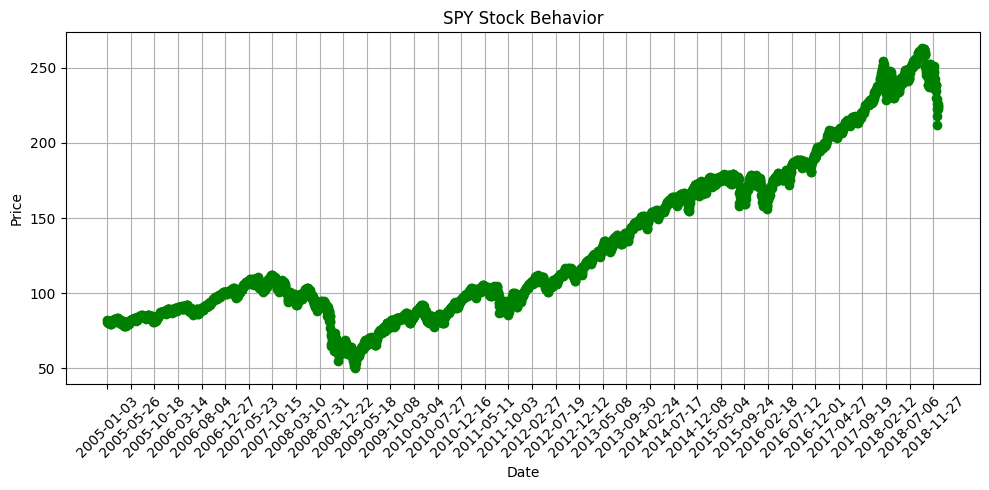

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(testing_SPY['Date'], testing_SPY['Close'], marker='o', linestyle='-', color='green')
plt.title('SPY Stock Behavior')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

skip = 100
plt.xticks(testing_SPY['Date'][::skip], rotation=45)

plt.tight_layout()
plt.show()

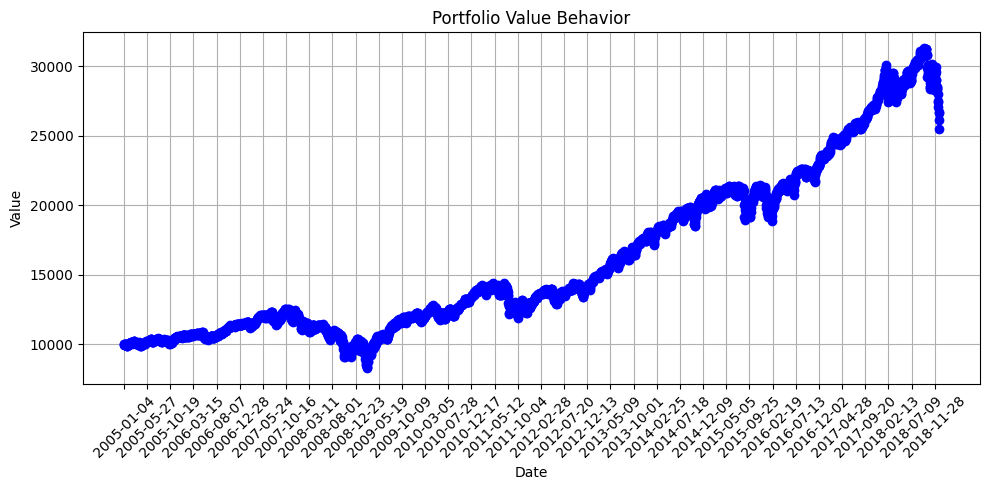

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(test_vis_SPY['Date'], test_vis_SPY['Portfolio_Values'], marker='o', linestyle='-', color='blue')
plt.title('Portfolio Value Behavior')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)

skip = 100
plt.xticks(test_vis_SPY['Date'][::skip], rotation=45)

plt.tight_layout()
plt.show()

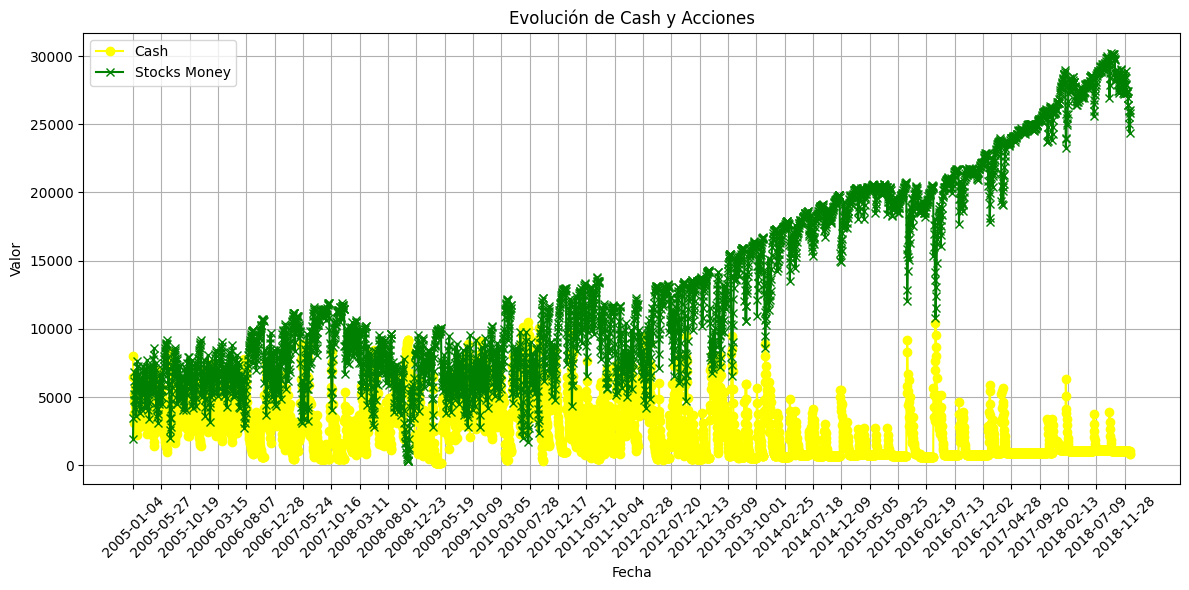

In [32]:
plt.figure(figsize=(12, 6))

plt.plot(test_vis_SPY['Date'], test_vis_SPY['Actual_Cash'], label='Cash', color='Yellow', marker='o')
plt.plot(test_vis_SPY['Date'], test_vis_SPY['Stocks_Money'], label='Stocks Money', color='Green', marker='x')

# Configuración general
plt.title('Evolución de Cash y Acciones')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

skip = 100
plt.xticks(test_vis_SPY['Date'][::skip], rotation=45)

plt.tight_layout()

# Mostrar
plt.show()

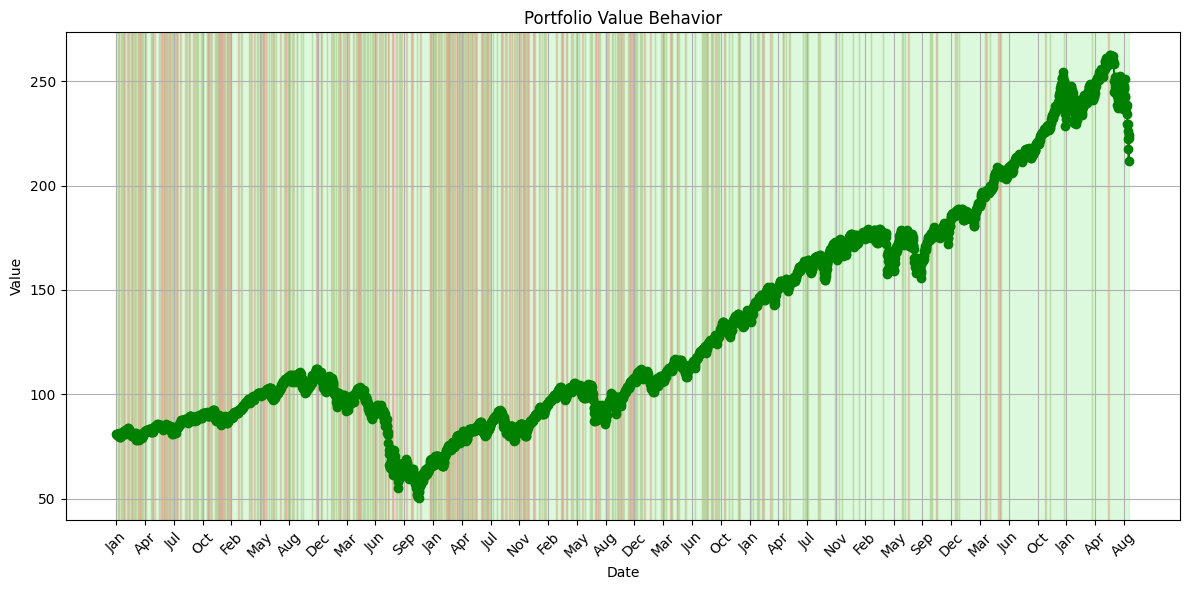

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test_vis_SPY['Date'], test_vis_SPY['Close'], color='green', marker='o')

state_colors = {
    'buy': 'lightgreen',
    'sell': 'lightcoral',
    'hold': 'lightyellow'
}

prev_state = None
start_date = None

for i, row in test_vis_SPY.iterrows():
    current_state = row['Color_Action']
    current_date = row['Date']

    if current_state != prev_state:
        if prev_state is not None:
            ax.axvspan(start_date, current_date, color=state_colors[prev_state], alpha=0.3)
        start_date = current_date
        prev_state = current_state

ax.axvspan(start_date, test_vis_SPY['Date'].iloc[-1], color=state_colors[prev_state], alpha=0.3)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.title("Portfolio Value Behavior")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)

skip = 100
plt.xticks(test_vis_SPY['Date'][::skip], rotation=45)

plt.tight_layout()
plt.show()